<a href="https://colab.research.google.com/github/M-torki/CSNN/blob/master/builder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [ ]:
!pip install healpy

     |████████████████████████████████| 15.8MB 284kB/s 


In [ ]:
!pip install git+https://github.com/vafaei-ar/ccgpack.git

  Cloning https://github.com/vafaei-ar/ccgpack.git to /tmp/pip-req-build-r30qfdem
  Running command git clone -q https://github.com/vafaei-ar/ccgpack.git /tmp/pip-req-build-r30qfdem
  Created wheel for ccgpack: filename=ccgpack-0.1.0-cp36-cp36m-linux_x86_64.whl size=898018 sha256=35615e28e032a0573491fdade19be414da13420e092741f40fcb9bac10c92feb
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zfnn9x0/wheels/a8/3c/86/3720d002b7c606972520b7468f7b9daf3da3acc3052facac45
Successfully built ccgpack


In [ ]:
import sys
sys.path.append('/gdrive/My\ Drive/git_reps/ccgpack')

In [ ]:
import os
import sys
import shutil
import argparse
import numpy as np
import pylab as plt
# import healpy as hp
# from ccgpack import ch_mkdir,download,sky2patch
from glob import glob

In [ ]:
cmap = plt.cm.jet
cmap.set_under('w')
cmap.set_bad('gray',1.)

parser = argparse.ArgumentParser(description='Short sample app')
parser.add_argument('-r', action="store_true", default=False)
parser.add_argument('--nsim', action="store", type=int, default=42)
args = parser.parse_args([])
replace = args.r
n_gaussian = args.nsim

nside = 2048
lmax = 3*nside

In [ ]:
if nside==2048:
    n_string=3
    ex = 'gz'
    import gzip
    
    def extract(in_file,out_file):
        with gzip.open(in_file, 'rb') as f_in:
            with open(out_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
elif nside==4096:
    n_string=1
    ex = 'xz'
        
    def extract(in_file,out_file):
        os.system('unxz '+in_file)   
else:
    assert 0,'Nside has to be either 2048 or 4096!'

In [ ]:
s = hp.read_map('./data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits',nest=1,verbose=0)
s_p = sky2patch(s,32)
np.save('./data/mask/mask_patches' , s_p)

/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
s_p.shape

(12288, 64, 64)

In [ ]:
patches = np.load('./data/mask/mask_patches.npy')

In [ ]:
patches.shape

(12288, 64, 64)

In [ ]:
output = './data/mask/64patches/'
prefix = ''
npatch = 12*32**2

for i in range(int(len(patches))):
    np.save(output+prefix+str(i),patches[i])
#     plt.imshow(patches[i], cmap=cmap)
#     plt.savefig(output+prefix+str(i)+'.jpg')
#     plt.close()    

In [ ]:
n_string = 3

ch_mkdir('./data/string/') 

for i in range(n_string): 
    strnum = str(i+1)
    if nside==4096:
        strnum = strnum+'b'
    if not os.path.exists('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.'+ex):
        print('Downloading string: '+str(i))
        download('http://cp3.irmp.ucl.ac.be/~ringeval/upload/data/'+str(nside)+'/map1n_allz_rtaapixlw_'+str(nside)+'_'+strnum+'.fits.'+ex,
          './data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.'+ex)

    load_status = 0
    if not os.path.exists('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits'):
        print('Extracting string: '+str(i))
#        with gzip.open('../data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.'+ex, 'rb') as f_in:
#            with open('../data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits', 'wb') as f_out:
#                shutil.copyfileobj(f_in, f_out)
        in_file = './data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.'+ex
        out_file = './data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits'
        extract(in_file,out_file)
        
        ss = hp.read_map('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits',verbose=0,nest=1)    
        load_status = 1        
        hp.mollview(ss, nest=1, cmap=cmap)    
        plt.savefig('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.jpg')
        plt.close()

In [ ]:
n_gaussian = 2

ch_mkdir('./data/ffp10/') 
                 
for i in range(38,40):
    mm = str(i).zfill(4)
    
    if not os.path.exists('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits') or replace:
        download('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits',
                './data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits')
                
        ss = hp.read_map('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits',verbose=0,nest=1)    
        hp.mollview(ss, nest=1, cmap=cmap)              
        plt.savefig('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.jpg')
        plt.close()

Fetching ./data/ffp10/ffp10_lensed_scl_cmb_100_mc_0038.fits...
Fetching ./data/ffp10/ffp10_lensed_scl_cmb_100_mc_0039.fits...
-565288960% complete

In [ ]:
n_train = 15
n_test  = 22

cmap = plt.cm.jet
cmap.set_under('w')
cmap.set_bad('gray',1.)
nside = 2048

def kelvin_check(m):
    if m.std()>1e-2:
        return 1e-6*m
    return m

In [ ]:
def kelvin_check(m):
   if m.std()>1e-2:
       return 1e-6*m
   return m

In [ ]:
cmap = plt.cm.jet
cmap.set_under('w')
cmap.set_bad('gray',1.)
nside = 2048


s_files = sorted(glob('./data/string/*.fits'))
print(s_files)

def kelvin_check(m):
   if m.std()>1e-2:
       return 1e-6*m
   return m
ch_mkdir('./data/string_p/')
npatch=12
i = 1
for s in s_files[1:]:
	s = hp.read_map(s,nest=0,verbose=0)
	s = kelvin_check(s)
	s = hp.smoothing(s,np.radians(5/60.),lmax=3*2048,verbose=0)
	s = hp.reorder(s , r2n=1)
	s_p = sky2patch(s,1)

	for j in range(12):
		np.save('./data/string_p/'+str(i*npatch+j),s_p[j])
		plt.imshow(s_p[j], cmap=cmap)
		plt.savefig('./data/string_p/'+str(i*npatch+j)+'.jpg')
		plt.close()
	i+=1 

[]


In [ ]:
from ccgpack import sky2patch
 
def build_map(inmap,output,i,ntot,
                ns=1,g=0,sml=5.,
                lmax= 3*2048,prefix=''):    
    ch_mkdir(dest)
    dont = 1
    npatch = 12*ns**2
    for j in range(npatch):
        if not os.path.exists(output+prefix+str(i*npatch+j)+'.npy'):
            dont = 0
    if dont:
        return
    
    if sml!=0:    
        s = hp.read_map(inmap,nest=0,verbose=0)
        if g:
            s = kelvin_check(s)
        s = hp.smoothing(s,np.radians(sml/60.),lmax=lmax,verbose=0)
        s = hp.reorder(s , r2n=1)
    else:
        s = hp.read_map(inmap,nest=1,verbose=0)
        if g:
            s = kelvin_check(s)
    patches = sky2patch(s,ns)
    for j in range(npatch):
#         pop_percent(i*npatch+j,ntot*npatch)
        np.save(output+prefix+str(i*npatch+j),patches[j])
        plt.imshow(patches[j], cmap=cmap)
        plt.savefig(output+prefix+str(i*npatch+j)+'.jpg')
        plt.close()

In [ ]:
from ccgpack import sky2patch
print('FFP10 gaussian maps:')
dest = './data/ffp10_p/'
ntot = 1
for i in range(39,40):
    inmap = './data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+str(i).zfill(4)+'.fits'
    build_map(inmap,dest,i,ntot,g=1,sml=0)

FFP10 gaussian maps:


In [ ]:
print('String maps:')
dest = './data/string_p/'
ntot = 3
for i in range(3):
    inmap = './data/string/map1n_allz_rtaapixlw_2048_'+str(i+1)+'.fits'
    build_map(inmap,dest,i,ntot,sml=5,g=0)

String maps:


In [ ]:
obs_adds = {'COM_CMB_IQU-smica_2048_R3.00_hm1.fits':'http://pla.esac.esa.int/pla-sl/data-action?MAP.MAP_OID=13486'}
ch_mkdir('./data/observations/hm1/') 
for name in obs_adds:

    if not os.path.exists(name):   
        download(obs_adds[name],'./data/observations/hm1/'+name)

Fetching ./data/observations/hm1/COM_CMB_IQU-smica_2048_R3.00_hm1.fits...
-594788352% complete

In [ ]:
https://pla.esac.esa.int/pla-sl/data-action?CMB_MAP.METHOD=smica&MAP.LAST_VERSION=true&MAP.TYPE=CMB_MAP&MAP.LEGACY=true&MAP_PERIOD.NAME=Full&MAP.RING_HALF=0&CMB_MAP.KINETIC=false
    
obs_adds = {'smica_full.fits':''}
ch_mkdir('./data/observations/') 
for name in obs_adds:

    if not os.path.exists(name):   
        download(obs_adds[name],'./data/observations/'+name)

In [ ]:
obs_adds = {'smica_dr3.fits':'http://pla.esac.esa.int/pla-sl/data-action?MAP.MAP_OID=13485'}
ch_mkdir('./data/observations/') 
for name in obs_adds:

    if not os.path.exists(name):   
        download(obs_adds[name],'./data/observations/'+name)

Fetching ./data/observations/smica_dr3.fits...
-1279614976% completeBuffered data was truncated after reaching the output size limit.

In [ ]:
print('OBSERVATIONS:') 
dest = './data/obs_p/'

mlist = glob('./data/observations/smica_dr3.fits')
for inmap in mlist:
    prefix = inmap.split('/')[-1][:-5]+'_'
    print('Observation: '+prefix)
    build_map(inmap, output= dest ,i=0,ntot=1,ns=32,g=0,sml=0,prefix=prefix)  

OBSERVATIONS:
Observation: smica_dr3_


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
a = np.load('./data/observations_p/smica_dr3_0.npy')
a.shape

(64, 64)

In [ ]:
print('OBSERVATIONS_100:') 
dest = './data/observations_p/'
mlist = glob('./data/HFI_SkyMap_100_2048_R3.01_full.fits')
for inmap in mlist:
    prefix = inmap.split('/')[-1][:-5]
    print('Observation: '+prefix)
    build_map(inmap,dest,i=0,ntot=1,g=1,sml=0,prefix=prefix)

OBSERVATIONS_100:
Observation: HFI_SkyMap_100_2048_R3.01_full


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
if not os.path.exists('./data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits'):
    ch_mkdir('./data/mask/')           
    download('http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID=COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits',
             './data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

Fetching ./data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits...
Download complete, saved as ./data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits



In [ ]:
print('MASK:') 
dest = './data/mask/'
inmap = './data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits'
build_map(inmap,dest,i=0,ntot=1,sml=0,g=0)

MASK:


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
print('MASK:') 
dest = './data/mask/256/'
inmap = './data/mask/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits'
build_map(inmap,dest,ns=8,i=0,ntot=1,sml=0,g=0)

MASK:


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
print('OBSERVATIONS:') 
dest = './data/observations_p/hm1/256/'
mlist = glob('./data/observations/hm1/*.fits')
for inmap in mlist:
    prefix = inmap.split('/')[-1][:-5]
    print('Observation: '+prefix)
    build_map(inmap,dest,i=0,ns=8,ntot=1,g=1,sml=0,prefix=prefix)

OBSERVATIONS:
Observation: COM_CMB_IQU-smica_2048_R3.00_hm1


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
print('NOISE:') 
obs_adds = {'ffp10_noise_100_full_map_mc_00000.fits':'http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_noise_100_full_map_mc_00000.fits'}
ch_mkdir('./data/observations/') 
for name in obs_adds:
    if not os.path.exists(name):   
        download(obs_adds[name],'./data/observations/'+name)

NOISE:
Fetching ./data/observations/ffp10_noise_100_full_map_mc_00000.fits...
-49061888% completeNOISE:
Fetching ./data/observations/ffp10_noise_100_full_map_mc_00000.fits...
-573456384% complete

In [ ]:
!wget -np -r http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_noise_100_full_map_mc_00000.fits

--2019-10-22 09:26:26--  http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_noise_100_full_map_mc_00000.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_noise_100_full_map_mc_00000.fits’

pla.esac.esa.int/pl     [ <=>                ] 576.01M  22.7MB/s    in 28s     

2019-10-22 09:26:55 (20.2 MB/s) - ‘pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_noise_100_full_map_mc_00000.fits’ saved [603987840]

FINISHED --2019-10-22 09:26:55--
Total wall clock time: 29s
Downloaded: 1 files, 576M in 28s (20.2 MB/s)


In [ ]:
n_gaussian = 1

ch_mkdir('./data/ffp10/') 
                 
for i in [800]:
    mm = str(i).zfill(4)
    
    if not os.path.exists('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits') or replace:
        download('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits',
                './data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits')
                
        ss = hp.read_map('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits',verbose=0,nest=1)    
        hp.mollview(ss, nest=1, cmap=cmap)              
        plt.savefig('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.jpg')
        plt.close()

Fetching ./data/ffp10/ffp10_lensed_scl_cmb_100_mc_0800.fits...
Download complete, saved as ./data/ffp10/ffp10_lensed_scl_cmb_100_mc_0800.fits



In [ ]:

ch_mkdir('./data/ffp_noise/') 
                 
for i in range(0,10):
    mm = str(i).zfill(5)
    
    if not os.path.exists('./data/ffp_noise/ffp10_noise_100_full_map_mc_'+mm+'.fits') or replace:
        download('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_noise_100_full_map_mc_'+mm+'.fits',
                 './data/ffp_noise/ffp10_noise_100_full_map_mc_'+mm+'.fits')
                
        ss = hp.read_map('./data/ffp_noise/ffp10_noise_100_full_map_mc_'+mm+'.fits',verbose=0,nest=1)    
        hp.mollview(ss, nest=1, cmap=cmap)              
        plt.savefig('./data/ffp_noise/ffp10_noise_100_full_map_mc_'+mm+'.jpg')
        plt.close()    

Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00000.fits...
Download complete, saved as ./data/ffp_noise/ffp10_noise_100_full_map_mc_00000.fits

Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00001.fits...
Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00002.fits...
Download complete, saved as ./data/ffp_noise/ffp10_noise_100_full_map_mc_00002.fits

Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00003.fits...
Download complete, saved as ./data/ffp_noise/ffp10_noise_100_full_map_mc_00003.fits

Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00004.fits...
Download complete, saved as ./data/ffp_noise/ffp10_noise_100_full_map_mc_00004.fits

Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00005.fits...
Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00006.fits...
Fetching ./data/ffp_noise/ffp10_noise_100_full_map_mc_00007.fits...
Download complete, saved as ./data/ffp_noise/ffp10_noise_100_full_map_mc_00007.fits

Fetching ./data/ffp_noise/ffp10

In [ ]:
ch_mkdir('./data/dx/') 
                 
for i in range(45,50):
    mm = str(i).zfill(5)
    
    if not os.path.exists('./data/dx/dx12_v3_smica_cmb_mc_'+mm+'_raw.fits') or replace:
        download('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=dx12_v3_smica_cmb_mc_'+mm+'_raw.fits',
                 './data/dx/dx12_v3_smica_cmb_mc_'+mm+'_raw.fits')
                
        ss = hp.read_map('./data/dx/dx12_v3_smica_cmb_mc_'+mm+'_raw.fits',verbose=0,nest=1)    
        hp.mollview(ss, nest=1, cmap=cmap)              
        plt.savefig('./data/dx/dx12_v3_smica_cmb_mc_'+mm+'_raw.jpg')
        plt.close()

Fetching ./data/dx/dx12_v3_smica_cmb_mc_00045_raw.fits...
Fetching ./data/dx/dx12_v3_smica_cmb_mc_00046_raw.fits...
Download complete, saved as ./data/dx/dx12_v3_smica_cmb_mc_00046_raw.fits

Fetching ./data/dx/dx12_v3_smica_cmb_mc_00047_raw.fits...
Fetching ./data/dx/dx12_v3_smica_cmb_mc_00048_raw.fits...
Download complete, saved as ./data/dx/dx12_v3_smica_cmb_mc_00048_raw.fits

Fetching ./data/dx/dx12_v3_smica_cmb_mc_00049_raw.fits...
-601997312% complete

In [ ]:
print('dx12-v3:') 
dest = './data/dx_p/'
# mlist = glob('./data/dx/*.fits')

for i in range(45,50):
    mm = str(i).zfill(5)

#     prefix = inmap.split('/')[-1][:-5]
#     print('Observation: '+prefix)
    inmap = './data/dx/dx12_v3_smica_cmb_mc_'+mm+'_raw.fits'
    build_map(inmap,dest,i=i,ns=1,ntot=5,g=0,sml=0)

dx12-v3:


In [ ]:
ch_mkdir('./data/noise/') 
                 
for i in range(42,44):
    mm = str(i).zfill(5)
    
    if not os.path.exists('./data/noise/dx12_v3_smica_noise_mc_'+mm+'_raw.fits') or replace:
        download('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=dx12_v3_smica_noise_mc_'+mm+'_raw.fits',
                './data/noise/dx12_v3_smica_noise_mc_'+mm+'_raw.fits')
                
        ss = hp.read_map('./data/noise/dx12_v3_smica_noise_mc_'+mm+'_raw.fits',verbose=0,nest=1)    
        hp.mollview(ss, nest=1, cmap=cmap)              
        plt.savefig('./data/noise/dx12_v3_smica_noise_mc_'+mm+'_raw.jpg')
        plt.close()

Fetching ./data/noise/dx12_v3_smica_noise_mc_00042_raw.fits...
Download complete, saved as ./data/noise/dx12_v3_smica_noise_mc_00042_raw.fits

Fetching ./data/noise/dx12_v3_smica_noise_mc_00043_raw.fits...
Download complete, saved as ./data/noise/dx12_v3_smica_noise_mc_00043_raw.fits



In [ ]:
dv = hp.read_map('./data/dv/dx12_v3_smica_cmb_mc_00000_raw.fits',verbose=0,nest=1)
dv.std()

0.00010937204207107985

In [ ]:
n = hp.read_map('./data/noise/dx12_v3_smica_noise_mc_00000_raw.fits',verbose=0,nest=1)
n.std()

1.3171996639176428e-05

In [ ]:
print('total:') 
ch_mkdir('./data/dx_p/') 
dest = './data/dx_p/'

for i in range(42,44):
    
    mm = str(i).zfill(5)
    dv = hp.read_map('./data/dx/dx12_v3_smica_cmb_mc_'+mm+'_raw.fits',verbose=0,nest=1)
    noise = hp.read_map('./data/noise/dx12_v3_smica_noise_mc_'+mm+'_raw.fits',verbose=0,nest=1)
    s = dv + noise
    patches = sky2patch(s,npatch=1)
    for j in range(12):
        np.save(dest+str(i*12+j),patches[j])
        plt.imshow(patches[j], cmap=cmap)
        plt.savefig(dest+str(i*12+j)+'.jpg')
        plt.close()
    print('total '+str(i)+' done!')

total:
total 42 done!
total 43 done!


In [ ]:
n_gaussian = 1

ch_mkdir('./data/ffp10/') 
                 
for i in [800]:
    mm = str(i).zfill(4,10)
    
    if not os.path.exists('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits') or replace:
        download('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits',
                './data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits')
                
        ss = hp.read_map('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.fits',verbose=0,nest=1)    
        hp.mollview(ss, nest=1, cmap=cmap)              
        plt.savefig('./data/ffp10/ffp10_lensed_scl_cmb_100_mc_'+mm+'.jpg')
        plt.close()

TypeError: ignored

In [ ]:
from ccgpack import sky2patch
print('FFP10 gaussian maps:')
dest = './data/test/ffp/256/'
# ntot = 1
inmap = './data/ffp10/ffp10_lensed_scl_cmb_100_mc_0800.fits'
build_map(inmap,dest,i=0 ,ntot=1,ns=8 ,sml=0,g=1)

FFP10 gaussian maps:


In [ ]:
print('smica - simulated noise')
noise = hp.read_map('./data/observations/noise.fits')

smica - simulated noise
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [ ]:
obs_adds = {'sevem_f100.fits':'http://pla.esac.esa.int/pla-sl/data-action?MAP.MAP_OID=13455'}
ch_mkdir('./data/observations/') 
for name in obs_adds:

    if not os.path.exists(name):   
        download(obs_adds[name],'./data/observations/'+name)

Fetching ./data/observations/sevem_f100.fits...
Download complete, saved as ./data/observations/sevem_f100.fits



In [ ]:
print('OBSERVATIONS:') 
dest = './data/observations_p/f100/256/'
mlist = glob('./data/observations/sevem_f100.fits')
for inmap in mlist:
    prefix = inmap.split('/')[-1][:-5]
    print('Observation: '+prefix)
    build_map(inmap,dest,i=0,ns=8,ntot=1,g=1,sml=0)

OBSERVATIONS:
Observation: sevem_f100


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [ ]:
obs_100 = hp.read_map('./data/HFI_SkyMap_100_2048_R3.01_full.fits' , field=0 ,nest=1 , hdu=1 , verbose=1 )

FileNotFoundError: ignored

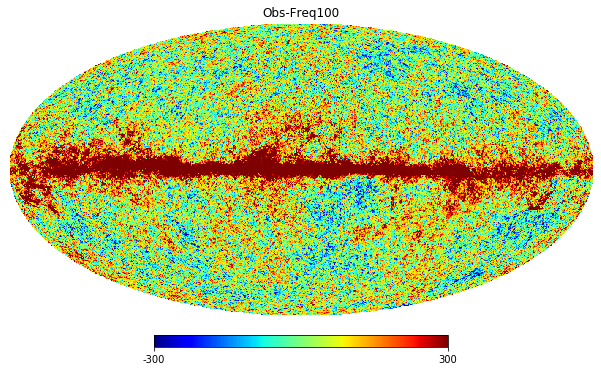

In [ ]:
hp.mollview(obs_100*1e6 , title='Obs-Freq100' , nest= 1

In [ ]:
obs_100.std()

2.3081324619291115e+26